# Logistic Regression

16BCE1259

Shushil Kumar Ravishankar

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
data=pd.read_csv('seeds.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


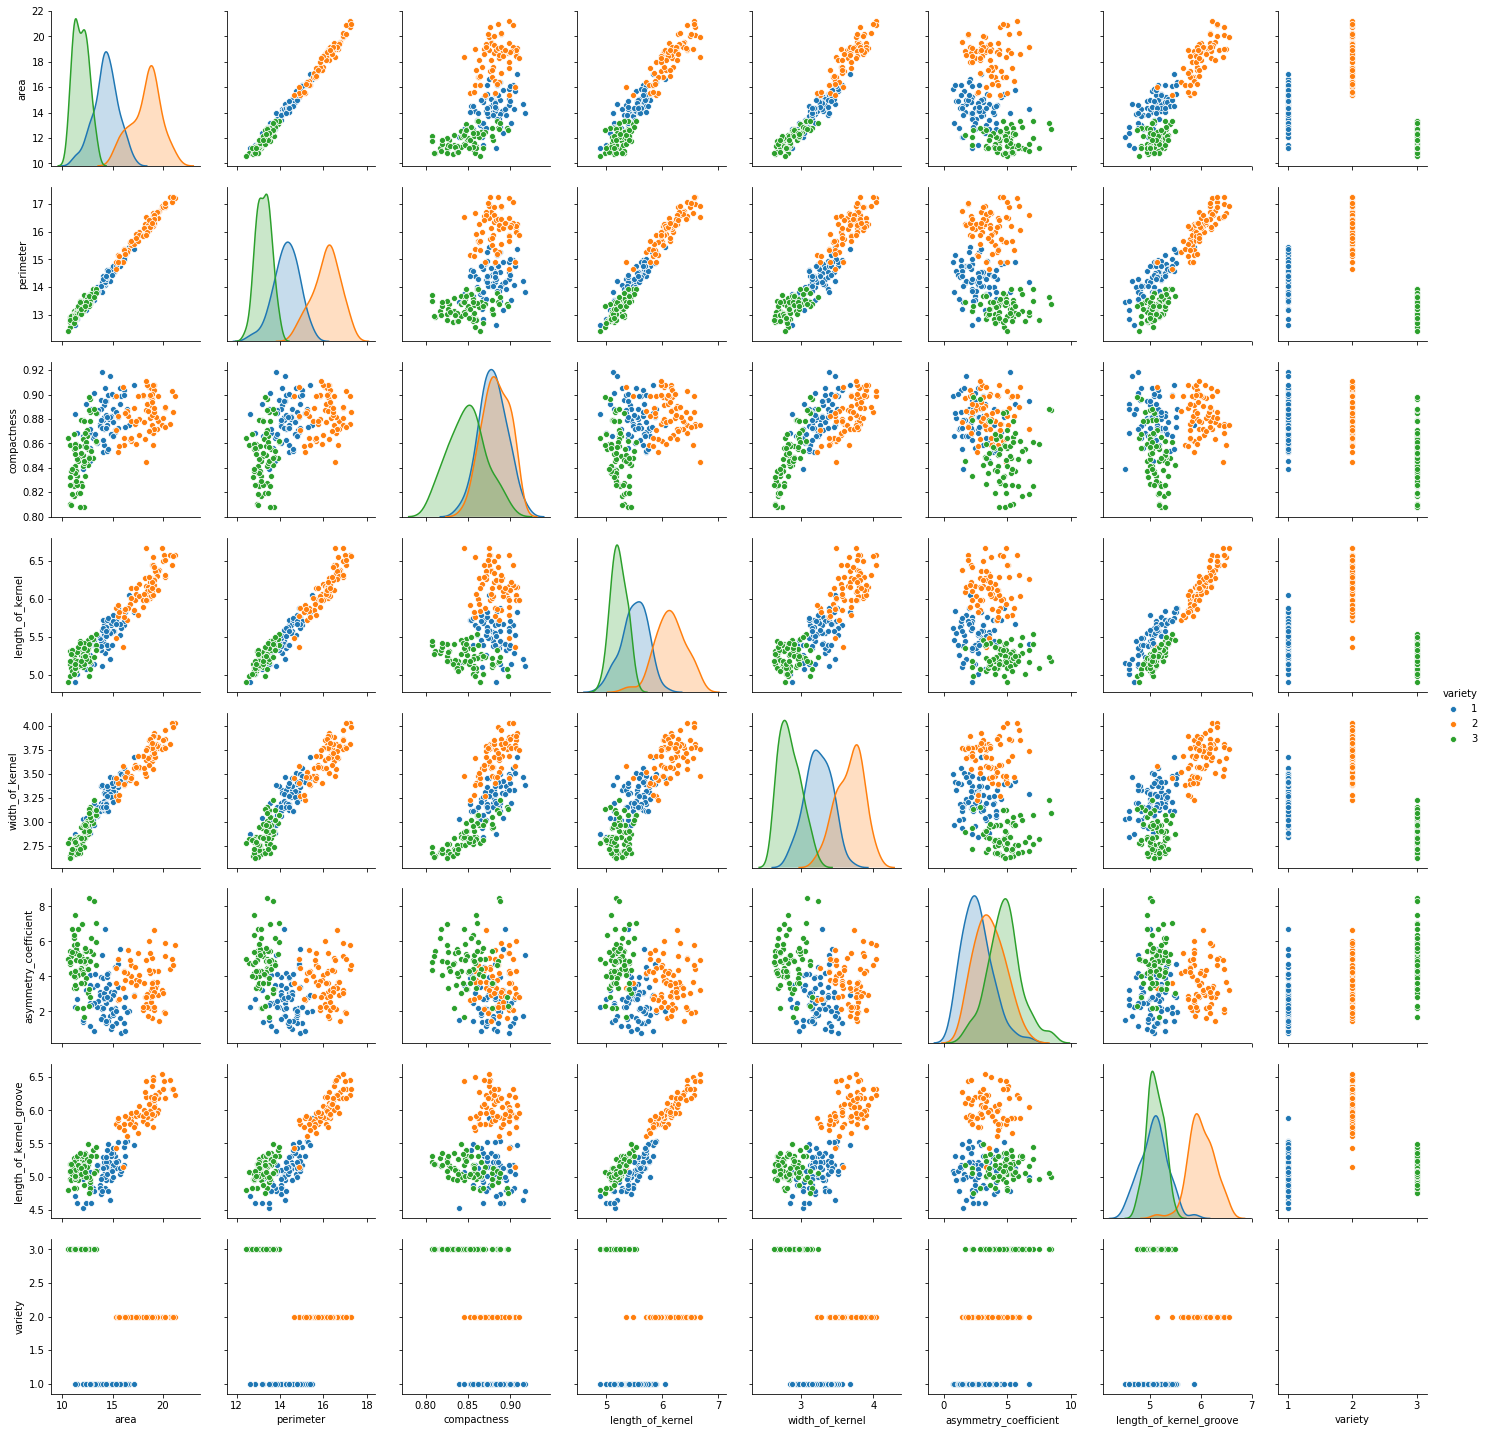

In [2]:
sns.pairplot(data,hue="variety")

In [3]:
import matplotlib.pyplot as plt

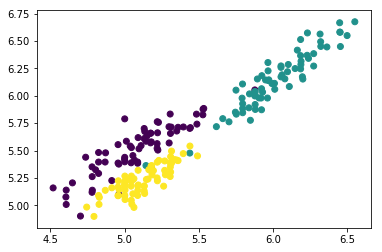

In [4]:
plt.scatter(data['length_of_kernel_groove'],data['length_of_kernel'],c=data['variety'])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
x=data[['length_of_kernel_groove','length_of_kernel']]

In [8]:
y=data['variety']

In [9]:
x_std=scaler.fit_transform(x)

In [10]:
x

,length_of_kernel_groove,length_of_kernel
0,5.220,5.763
1,4.956,5.554
2,4.825,5.291
3,4.805,5.324
4,5.175,5.658
5,4.956,5.386
6,5.219,5.563
7,5.000,5.420
8,5.877,6.053
9,5.533,5.884


In [11]:
x_std

array([[-0.38357742,  0.3042182 ],
       [-0.92201349, -0.16862466],
       [-1.18919199, -0.76363745],
       [-1.2299826 , -0.68897805],
       [-0.4753563 ,  0.06666556],
       [-0.92201349, -0.54870888],
       [-0.38561695, -0.14826301],
       [-0.83227414, -0.47178707],
       [ 0.95639414,  0.96031595],
       [ 0.25479564,  0.57796933],
       [-0.19186155,  0.1933603 ],
       [-0.83023461, -0.43106376],
       [-1.36663115, -0.42880136],
       [-1.09333405, -0.33830512],
       [-1.18919199, -0.3315179 ],
       [-1.27893133, -0.62789309],
       [-1.27893133, -1.15277129],
       [-0.73845574, -0.22970963],
       [-1.54814936, -0.95820437],
       [-1.00767377, -0.91069385],
       [-0.47331677,  0.06666556],
       [-0.38561695, -0.24554647],
       [-0.64667686, -0.02383068],
       [-0.91181583, -1.19801941],
       [-0.83023461,  0.36304076],
       [-0.20613827,  0.46258662],
       [-1.18919199, -0.52834722],
       [-1.09945264, -0.52834722],
       [-0.75477198,

In [12]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y)

In [34]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       X_test, y_test = float(X[test_idx, :]),float(y[test_idx])
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
       if test_idx:
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf=LogisticRegression()

In [17]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred=clf.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_pred,y_test)

0.8679245283018868

TypeError: only size-1 arrays can be converted to Python scalars

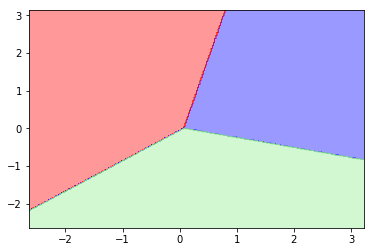

In [35]:
plot_decision_regions(x_train,y_train, classifier=clf,test_idx=range(50,152))

In [31]:
x_test.shape

(53, 2)

In [32]:
x_train.shape

(157, 2)